In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_excel("./Datasets/HVAC_limpio.xlsx", "HVAC_limpio", index_col=0)
#data

In [3]:
data['Fecha- hora de lectura'] = (data['Fecha- hora de lectura'] - data['Fecha- hora de lectura'].min())  / np.timedelta64(1,'D')
#data.drop(['Fecha- hora de lectura'], axis=1, inplace=True)

In [5]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim != None:
        plt.ylim(*ylim)
    plt.xlabel("Training samples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Train score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Test score")

    plt.legend(loc="best")
    return plt

In [15]:
from sklearn.neighbors import KNeighborsRegressor

def kNRegressor(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    neigh = KNeighborsRegressor(n_neighbors=15)
    neigh.fit(X_train, y_train) 
    predicts = neigh.predict(X_test)
    acc = neigh.score(X_test, y_test)
    mse = mean_squared_error(y_test, predicts)
    print("Accuracy: ", acc)
    print("MSE: ", mse)
    #print(predicts.tolist())
    return neigh

## C_O_P MÁQUINA GRUPO FRÍO 1

In [16]:
X = data[['POTENCIA GRUPO FRÍO 1', 'POTENCIA TERMICA GRUPO FRIO 1', 'TEMPERATURA EXTERIOR']]
y = data['C_O_P MÁQUINA GRUPO FRÍO 1']
neighGrupoFrio1 = kNRegressor(X, y)

Accuracy:  0.8619039967281192
MSE:  0.12079067323744944


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from '//anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

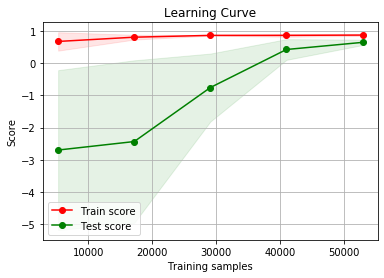

In [17]:
plot_learning_curve(neighGrupoFrio1, "Learning Curve", X, y)

## C_O_P MÁQUINA GRUPO FRÍO 2

In [18]:
X = data[['POTENCIA GRUPO FRÍO 2', 'POTENCIA TERMICA GRUPO FRIO 2', 'TEMPERATURA EXTERIOR']]
y = data['C_O_P MÁQUINA GRUPO FRÍO 2']
neighGrupoFrio2 = kNRegressor(X, y)

Accuracy:  0.897512974115601
MSE:  0.24693198838559707


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from '//anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

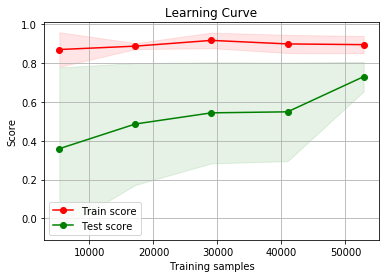

In [19]:
plot_learning_curve(neighGrupoFrio2, "Learning Curve", X, y)

## C_O_P BOMBA CALOR CARLOS

In [20]:
X = data[['POTENCIA BOMBA CALOR CARLOS', 'POTENCIA TERMICA BOMBA CALOR CARLOS', 'TEMPERATURA EXTERIOR',
          'TEMPERATURA SALIDA BOMBA CALOR CARLOS']]
y = data['C_O_P BOMBA CALOR CARLOS']
neighCalorCarlos = kNRegressor(X, y)

Accuracy:  0.803247476918888
MSE:  0.027107697132188965


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from '//anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

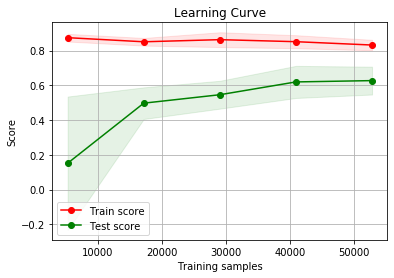

In [21]:
plot_learning_curve(neighCalorCarlos, "Learning Curve", X, y)

## C_O_P BOMBA CALOR FELIPE

In [22]:
X = data[['POTENCIA BOMBA CALOR FELIPE', 'POTENCIA TERMICA BOMBA CALOR FELIPE', 'TEMPERATURA EXTERIOR',
          'TEMPERATURA SALIDA BOMBA CALOR FELIPE']]
y = data['C_O_P BOMBA CALOR FELIPE']
neighCalorFelipe = kNRegressor(X, y)

Accuracy:  0.7552698087032846
MSE:  0.01980178334715526


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from '//anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

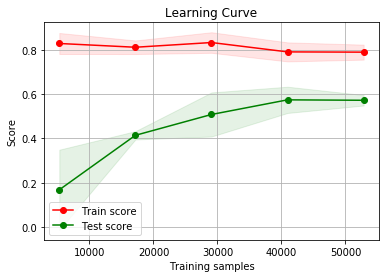

In [23]:
plot_learning_curve(neighCalorFelipe, "Learning Curve", X, y)